# Due June/20/2018 11:59:59 PM, PST.

## Probability Review (10%)
In a certain day care class, 30% of the children have grey eyes, 50% of them have blue and the other 20%'s eyes are in other colors. One day they play a game together. In the first run, 65% of the grey eye ones, 82% of the blue eyed ones and 50% of the children with other eye color were selected. Now, if a child is selected randomly from the class, and we know that he/she was not in the first game, what is the probability that the child has blue eyes?

In [97]:
total = 100
g = 0.3*100
b = 0.5*100
oc = 0.2*100
p_b = b/total
p_g = g/total
p_oc = oc/total
p_nig_b = 1-0.82
p_nig_g = 1-0.65
p_nig_oc = 1-0.5
p_nig = p_b*p_nig_b + p_g*p_nig_g + p_oc*p_nig_oc
p_b_nig = p_nig_b * p_b / p_nig

print("The probability of child having blue eyes when randomly selected \nand given he/she was not in the first game is "+str(p_b_nig))

The probability of child having blue eyes when randomly selected 
and given he/she was not in the first game is 0.305084745763


## Linear Algebra Review (10%)
(1) What is Gram-Schmidt procedure ? 
<br>
(2) Do Gram-Schmidt procedure for the vectors x1 = (1, 1 ,0), x2 = (1, 0, 1), x3 = (0, 1, 1) in $R^3$.

In [98]:
import numpy as np

x1 = np.array([1,1,0])
x2 = np.array([1,0,1])
x3 = np.array([0,1,1])

v1 = x1[:]
v2 = x2 - ((x2.dot(v1)/(np.linalg.norm(v1)**2)))*v1
v3 = x3 - ((x3.dot(v2)/(np.linalg.norm(v2))**2))*v2 - ((x2.dot(v1)/(np.linalg.norm(v1))**2))*v1
print("Gram-Schmidt procedure".title())
print("The orthogonal basis for the given set of vectors x1,x2,x3 ")
print(x1)
print(x2)
print(x3)
print("\nOrthogonal Vectors ")
print(v1)
print(v2)
print(v3)
#normalized vectors
v1 = v1/np.linalg.norm(v1)
v2 = v2/np.linalg.norm(v2)
v3 = v3/np.linalg.norm(v3)
print("\nNormalized form")
print(v1)
print(v2)
print(v3)


Gram-Schmidt Procedure
The orthogonal basis for the given set of vectors x1,x2,x3 
[1 1 0]
[1 0 1]
[0 1 1]

Orthogonal Vectors 
[1 1 0]
[ 0.5 -0.5  1. ]
[-0.66666667  0.66666667  0.66666667]

Normalized form
[ 0.70710678  0.70710678  0.        ]
[ 0.40824829 -0.40824829  0.81649658]
[-0.57735027  0.57735027  0.57735027]


## Hessian for Logistic Regression (10%)
Consider the average empirical loss  for logistic regression:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \log (1 + e^{-y_i \theta^T x_i}) = - \frac{1}{m} \sum_{i=1}^{m} \log (h_{\theta}(y_i x_i)))$$

where $h_{\theta}(x) = g(\theta^{T} x)$ and $g(z) = \frac{1}{1 + e^{-z}}$. 

(1) Find the Hessian $H$ of $J(\theta)$.
<br>
(2) Show that Hessian is non-negative definite.



Solution:
(1) Hessian of $H$ of $J(\theta)$

$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \log(1+e^{(-y_i \theta^T x_i)})$

$\frac{\partial J(\theta)}{\partial \theta_k} = \frac{1}{m} \sum_{i=1}^{m} \frac{e^{-y^{(i)}\theta^{i}x^{i}}}{1+e^{(-y_i \theta^T x_i)}} (-y^{(i)}x_k^{(i)})$

$\frac{\partial J(\theta)}{\partial \theta_k} = \frac{1}{m} \sum_{i=1}^{m} \frac{1}{1+e^{(-y_i \theta^T x_i)}} (-y^{(i)}x_k^{(i)})$

$\frac{\partial J(\theta)}{\partial \theta_k} = -\frac{1}{m} \sum_{i=1}^{m} h_\theta (-y^{(i)}x^{(i)})(y^{(i)}x_k^{(i)})$

$\frac{\partial^{2} J(\theta)}{\partial \theta_l\partial \theta_k} = -\frac{1}{m} \sum_{i=1}^{m} \frac{\partial}{\partial \theta_l}  h_\theta  (-y^{(i)}x^{(i)})(y^{(i)}x_k^{(i)})$

$\frac{\partial^{2} J(\theta)}{\partial \theta_l\partial \theta_k} = -\frac{1}{m} \sum_{i=1}^{m} h_\theta (-y^{(i)}x^{(i)}) (1- h_\theta (-y^{(i)}x^{(i)})) (-y^{(i)}x_k^{(i)}) (-y^{(i)}x_l^{(i)})$

$H_{kl}= -\frac{1}{m} \sum_{i=1}^{m} h_\theta (x^{(i)}) (1- h_\theta (x^{(i)})) x_l^{(i)}x_k^{(i)}$

Hessian doesn't depend on the training parameters $y_i$ because $y^{i}$ belongs to {|1|} i.e + or - 1, so y*y is always 1 and $f(x) = h_\theta$


and so 
$H = \frac{1}{m} \sum_{i=1}^{m} h (x^{(i)}) (1- h(x^{(i)})) x^{(i)}x^{(i)T}$






(2) Show that Hessian is non-negative definite.

Let us consider a vector A to prove 

$A^THA$
$= A^T (\frac{1}{m} \sum_{i=1}^{m} h (x^{(i)}) (1- h(x^{(i)})) x^{(i)}x^{(i)T})A$


$= \sum_{i=1}^{m} h (x^{(i)}) (1- h(x^{(i)})) A^{T}x^{(i)}x^{(i)T}A$

$= \sum_{i=1}^{m} h (x^{(i)}) (1- h(x^{(i)})) (A^{T}x^{(i)})^{2}$

Since $(A^{T}x^{(i)})^{2} $ is always >= 0 , so Hessian is always positive.


### linear regression model using stochastic gradient (40%)

In this problem, we will train a linear regression model using stochastic gradient descent on the
Wine Quality dataset. The data provide to train is "winequality-white.csv". We will partition the problem into following three parts:

<br>

A. Making Predictions

<br>

B. Esimating Coefficients

<br>

C. Wine Quality Testing

The Wine Quality Dataset involves predicting the quality of white wines on a scale given
chemical measures of each wine. It is a multiclass classication problem, but could also be
framed as a regression problem. The number of observations for each class is not balanced.
There are 4,898 observations with 11 input variables and 1 output variable. The variable names
are as follows:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide.
7. Total sulfur dioxide.
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).


In [99]:
# Possible Python lib required to run this problem. 
from random import seed
from random import randrange
from csv import reader
from math import sqrt

### A. Making Prediction
### Given dataset with 5 point, the first is input value, 
### and the second is the expected value

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6,6]]

### Also given linear model coefficient as 

coef = [0.5, 0.8]

### where the first component is b0 and the second component is b1 and 
### model is assumed as y = b0 + b1*x

### Can you write a predict function to return predicted value?



In [100]:
def predict(row, coef):
    pred_value = coef[0]+coef[1]*row
    return pred_value
    
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6,6]]
coef = [0.5, 0.8]
for row in dataset:
    predValue =predict(row[0],coef)
    print("Actual Value is : {}  Predicted Value is: {}".format(row[1],predValue))

Actual Value is : 1  Predicted Value is: 1.3
Actual Value is : 3  Predicted Value is: 2.1
Actual Value is : 3  Predicted Value is: 3.7
Actual Value is : 2  Predicted Value is: 2.9
Actual Value is : 5  Predicted Value is: 4.5
Actual Value is : 6  Predicted Value is: 5.3


### B. Esimating Coefficients



### Given dataset with 6 point, the first is input value, and the second is the expected value

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6, 6]]

l_rate = 0.01

n_epoch = 50

### Can you write a function to return coefficients based on stochastic gradient descent method 

In [101]:
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]   
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            pred_value = predict(row[0], coef)
            error = pred_value - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
    return coef

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6,6]]
l_rate = 0.01
n_epoch = 50
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print("Coefficients of the function based on stochastic gradient descent method are :")
print(coef)

Coefficients of the function based on stochastic gradient descent method are :
[0.1582964840002725, 0.9299780316132864]


###### C. Wine Quality Testing

If we partition the data set uniformly into 6 parts, could you write a code to get the average value of absoulte error between prediction and expected (average over these 6 partitoned datasets)?

In [102]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += abs(prediction_error)
    mean_error = sum_error / float(len(actual))
    return mean_error
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        rmse = rmse_metric(actual, predicted)
        scores.append(rmse)
    return scores
 
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			yhat = predict(row, coef)
			error = yhat - row[-1]
			coef[0] = coef[0] - l_rate * error
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
			# print(l_rate, n_epoch, error)
	return coef

# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return(predictions)
 
# Linear Regression on wine quality dataset
seed(1)
# load and prepare data
filename = 'winequality-white.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.01
n_epoch = 50
scores = evaluate_algorithm(dataset, linear_regression_sgd, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Average: %.3f' % (sum(scores)/float(len(scores))))

Scores: [0.09360292442706106, 0.09924215239175124, 0.09800153606411634, 0.09938411642096273, 0.1004066854898675]
Average: 0.098


### Naive Bayes Classifier for Digit Recognition (30%)

In [103]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from copy import copy, deepcopy

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [104]:


# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/mnist-original.mat')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)



# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]



('data shape: ', (70000L, 784L))
('label shape:', (70000L,))


In [47]:
#print test_data[0]

### A. Create a 10x10 grid to visualize 10 examples of each digit.

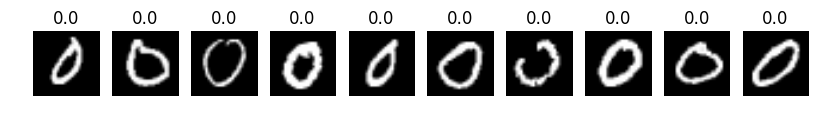

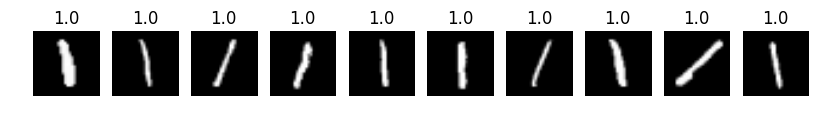

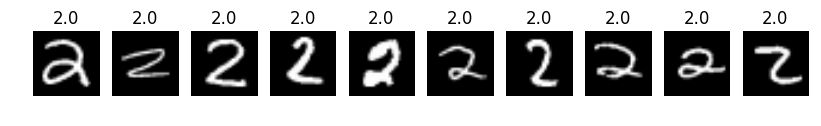

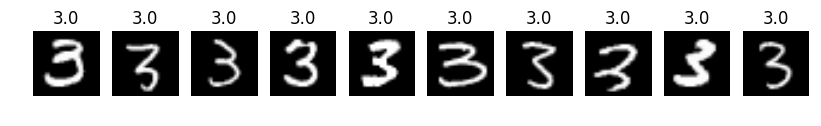

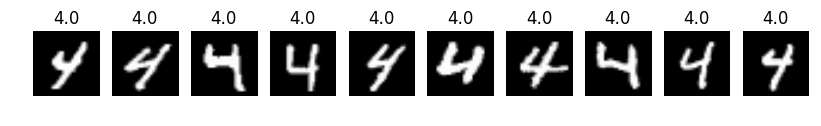

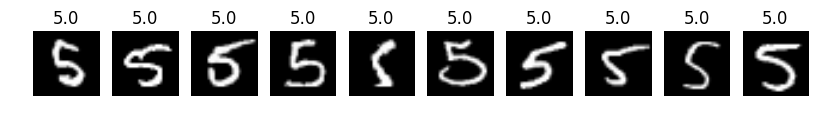

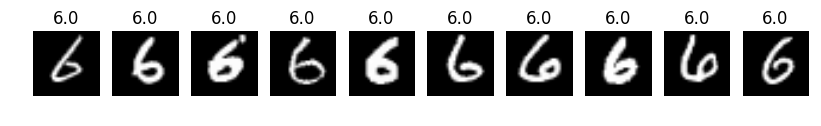

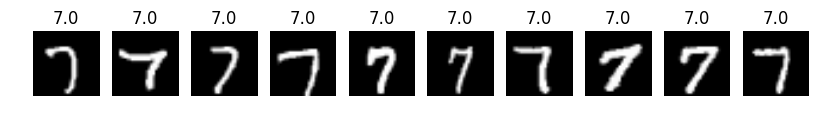

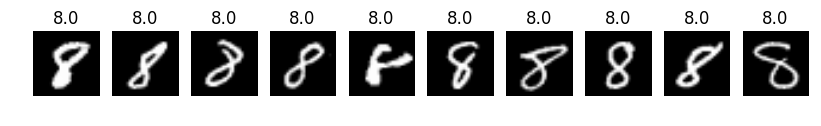

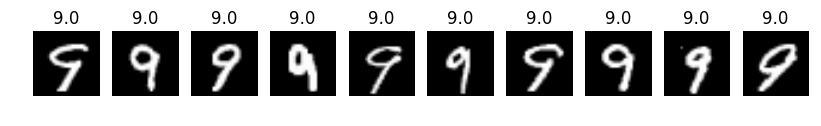

In [105]:
#print  mnist
#print mnist

data = mnist['data']
target = mnist['target']
#print(data.dtype,target.dtype)
#print(data.shape,target.shape)

def plot_img(images,lables):
    cols = len(images)
    rows = len(images)
    figure = plt.figure(figsize=(10,10))
    #print cols*rows
    for i in range(cols):
        x = figure.add_subplot(rows,cols,i+1)
        plt.axis("off")
        plt.imshow(images[i], cmap=plt.cm.gray)
        x.set_title(lables[i])
    plt.show()
    
    
#p = np.random.permutation(len(data))
whole_data = np.random.permutation(len(data))
#p = p[:20]
#test = p[0]
#print "blah blah"
#print p
#print target[p]
#plot_img(data[p].reshape(-1,28,28), target[p])


counter = 0
iteration_count = 0

number = 0
while number<10:
    new_img_index=[]
    counter = 0
    while counter<10:
        if(target[whole_data[iteration_count]] == number):
            new_img_index.insert(counter,whole_data[iteration_count])
            counter = counter + 1
        iteration_count = iteration_count + 1
    plot_img(data[new_img_index].reshape(-1,28,28), target[new_img_index])
    #print new_img_index
    number = number +1

#print new_img_index


### B.  Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?
### Note, the answers may vary depending on what thresholds you set.

Looking at the classification report, MultinomailNB is having higer precision, and can be inferred that it will perform better.

Considering the context in which Bernoulli NB is trained i.e binarized data and the model considers its features conditionally independent. 
While digit classifying a few centrain dependencies will come into picture, thus Multinomial NB model performing well over the Bernoulli NB model

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

The accuracy of Bernoulli NB trained on pre processed(binarized) dev_data is observed to be 0.826


Classification Report:
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.95        99
        1.0       0.86      0.96      0.91       105
        2.0       0.84      0.77      0.81       102
        3.0       0.71      0.78      0.74        86
        4.0       0.85      0.79      0.82       104
        5.0       0.87      0.71      0.78        91
        6.0     

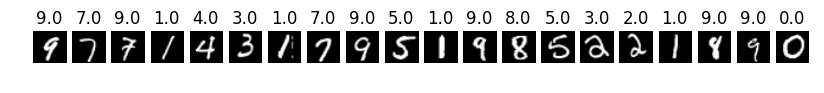

In [106]:
print("Looking at the classification report, MultinomailNB is having higer precision, and can be inferred that it will perform better.\n")
print("Considering the context in which Bernoulli NB is trained i.e binarized data and the model considers its features conditionally independent. ")
print("While digit classifying a few centrain dependencies will come into picture, thus Multinomial NB model performing well over the Bernoulli NB model\n")

#print("Since the data is having a definite results and not the counts, BernoulliNB will perform better than the MultinomialNB")
#New approach by binarizing
from sklearn.preprocessing import binarize
mdlBNB_n = BernoulliNB()
mdlBNB_n.fit(binarize(train_data),train_labels) #Pre Processing the train data to binarize
prediction_BNB_N = mdlBNB_n.predict(binarize(dev_data))
print(mdlBNB_n)

print("\nThe accuracy of Bernoulli NB trained on pre processed(binarized) dev_data is observed to be "+str(accuracy_score(dev_labels,prediction_BNB_N)))
print("\n\nClassification Report:")
print(classification_report(dev_labels,prediction_BNB_N))
print("\nBelow are few same inputs and outputs of the dev_data, you can observe some data(8 and 9) may vary from the lables, because of low precision as observed in the classification report")
print("\nPlease note, if you don't find the differnce, run the code again, mostly 8 and 9 will be wrongly interpreted")
p = np.random.permutation(len(dev_data))
p = p[:20]
plot_img(dev_data[p].reshape(-1,28,28),prediction_BNB_N[p])


# mdlMNB_n = MultinomialNB()
# #dev_data.shape 
# mdlMNB_n.fit(train_data,train_labels)

# predictions_MNB_N = mdlMNB_n.predict(dev_data)
# print(mdlMNB_n)
# print("\n\nClassification Report:")
# print(classification_report(dev_labels,predictions_MNB_N))
# print("The accuracy of Multinomial NB trained on dev_data is observed to be "+str(accuracy_score(dev_labels,predictions_MNB_N)))
# print("\nBelow are few same inputs and outputs of the dev_data, you can observe some data(8 and 9) may vary from the lables, because of low precision as observed in the classification report")
# print("\nPlease note, if you don't find the differnce, run the code again, mostly 8 and 9 will be wrongly interpreted")
# p = np.random.permutation(len(dev_data))
# p = p[:20]
# plot_img(dev_data[p].reshape(-1,28,28),predictions_MNB_N[p])





In [107]:
train_data_bck = deepcopy(train_data)
# print train_data_bck.dtype
print(train_data_bck.shape)
#print train_data_bck[55]
tresh1 =np.linspace(0,0.3,20)
tresh2 = np.linspace(0.5,0.67,20)
tre1 = 0.3
tre2 = 0.68 
for i in range(0,len(train_data_bck)):
    for j in range(0,784):
        if train_data_bck[i][j]<tre1:
            train_data_bck[i][j] = 0
        elif  train_data_bck[i][j]>tre1 and train_data_bck[i][j]<tre2:
            train_data_bck[i][j] = 1
        else:
            train_data_bck[i][j] = 2
#print train_data_bck[0]
#    print i
# for i in range(1,100):
#     print  data[54226][i+100]

#dev_data_bck = deepcopy(dev_data)


(60000L, 784L)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

The accuracy of Multinomial NB trained on dev_data is observed to be 0.828


Classification Report:
             precision    recall  f1-score   support

        0.0       0.93      0.97      0.95        99
        1.0       0.91      0.94      0.93       105
        2.0       0.87      0.77      0.82       102
        3.0       0.74      0.77      0.75        86
        4.0       0.87      0.75      0.80       104
        5.0       0.85      0.70      0.77        91
        6.0       0.91      0.88      0.89        98
        7.0       0.96      0.79      0.86       113
        8.0       0.66      0.84      0.74        96
        9.0       0.68      0.85      0.76       106

avg / total       0.84      0.83      0.83      1000


Below are few same inputs and outputs of the dev_data, you can observe some data(8 and 9) may vary from the lables, because of low precision as observed in the classification report

Please note, if y

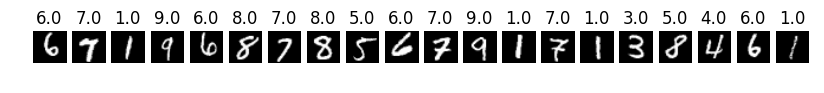

In [108]:
#After discritizing the training data to 0,1,2 train the Multinomial NB
mdlMNB_n_d = MultinomialNB()
#dev_data.shape 
mdlMNB_n_d.fit(train_data_bck,train_labels)

predictions_MNB_N_d = mdlMNB_n_d.predict(dev_data)
print(mdlMNB_n_d)

print("\nThe accuracy of Multinomial NB trained on dev_data is observed to be "+str(accuracy_score(dev_labels,predictions_MNB_N_d)))
print("\n\nClassification Report:")
print(classification_report(dev_labels,predictions_MNB_N_d))
print("\nBelow are few same inputs and outputs of the dev_data, you can observe some data(8 and 9) may vary from the lables, because of low precision as observed in the classification report")
print("\nPlease note, if you don't find the differnce, run the code again, mostly 8 and 9 will be wrongly interpreted")
p = np.random.permutation(len(dev_data))
p = p[:20]
plot_img(dev_data[p].reshape(-1,28,28),predictions_MNB_N_d[p])

# predictions_MNB_N_d_train_data = mdlMNB_n_d.predict(train_data_bck)
# p = np.random.permutation(len(train_data_bck))
# p = p[:20]
# plot_img(train_data_bck[p].reshape(-1,28,28),predictions_MNB_N_d_train_data[p])



### C. Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Could you explain why?

Given the boundry of the training data is between 0 and 1, Gussian Distribution has a less variance and hence biased. And hence low accuracy and incorrect results

The accuracy score of GuassianNB on dev data is 0.571

             precision    recall  f1-score   support

        0.0       0.72      0.97      0.83        99
        1.0       0.83      0.94      0.88       105
        2.0       0.90      0.25      0.40       102
        3.0       0.77      0.42      0.54        86
        4.0       0.85      0.21      0.34       104
        5.0       0.40      0.02      0.04        91
        6.0       0.66      0.94      0.78        98
        7.0       0.79      0.27      0.41       113
        8.0       0.33      0.70      0.45        96
        9.0       0.39      0.94      0.55       106

avg / total       0.67      0.57      0.52      1000



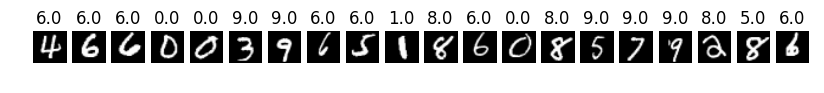

In [109]:
print("Given the boundry of the training data is between 0 and 1, Gussian Distribution has a less variance and hence biased. And hence low accuracy and incorrect results")
mdlGNB = GaussianNB()
mdlGNB.fit(train_data,train_labels)
predictions_GNB = mdlGNB.predict(dev_data)
print("\nThe accuracy score of GuassianNB on dev data is "+str(accuracy_score(dev_labels,predictions_GNB))+"\n")
print(classification_report(dev_labels,predictions_GNB))
#print dev_labels.shape,predictions_GNB.shape
p = np.random.permutation(len(dev_data))
p = p[:20]
plot_img(dev_data[p].reshape(-1,28,28),predictions_GNB[p])

#Given the boundry of the training data is between 0 and 1, Gussian Distribution has a less variance and hence biased from range 